<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Ingeniería de características & funciones</h1>
  <p></p>
</div>

In [1]:
from pickle import load, dump
#%matplotlib auto
from seaborn import pairplot
import matplotlib.pyplot as plt
#from seaborn import set
from seaborn import heatmap
from pandas import Categorical
from numpy import mean,log2,std
import seaborn as sns
import matplotlib
import numpy as np
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
#set(style="ticks")

In [2]:
#Variables categóricas y target
cat_col = []
label = '' 

### Cargar datos 

In [3]:
# Load data (deserialize)
with open('../Data/data_processing.pickle', 'rb') as handle:
    df = load(handle)

In [4]:
df.head()

,Num_vehiculos_hora,mes,dia_semana,hora_dia
Fecha,,,,
2021-03-01 00:00:00,1871,3,1,1
2021-03-01 01:00:00,794,3,1,2
2021-03-01 02:00:00,478,3,1,3
2021-03-01 03:00:00,377,3,1,4
2021-03-01 04:00:00,639,3,1,5


In [5]:
df.size

17652

## Transformaciones

### Normalizar variables númericas


Se normalizan a través de un proceso de estandarización de datos: El objetivo es ajustar los datos bajo una premisa de distribución normal. Tiene la ventaja de que no es "desbordado" por los nuevos valores, a diferencia de la normalizacipon por escalamiento (Mini-Max). Es la opción más recomendada debido a que los datos probienen de sesores físicos 

La transformación es:

$$X = \frac {X-\mu }{\sigma }$$





In [6]:
from scipy.stats import zscore

#df[''] = zscore(df[''].values, axis=0)

#NO aplica



### Codificación de características cíclicas


#### Variable Date

Los datos representados de forma categorica ordinal (discreta) para la variable `month` se ven de la siguiente forma:

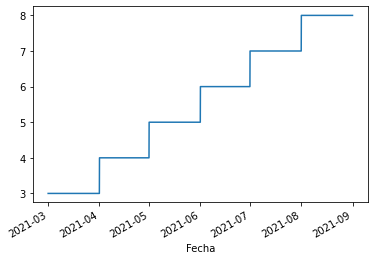

In [7]:
ax = df['mes'].plot()



Un método común para codificar datos cíclicos es transformar los datos en dos dimensiones utilizando una transformación seno y conseno

Podemos hacer eso usando las siguientes transformaciones:

In [8]:
def encode(data, col, max_val):
    """
    Aplicar la transformación seno y coseno a un vetor
    
    input 
            data:
            col:
            max_val:
    
    output
            data
    """
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [9]:
df = encode(df, 'mes', 12)
df = encode(df, 'hora_dia', 24)
df = encode(df, 'dia_semana', 7)


Ahora la diferencia absoluta entre el mes 11, el mes 12 (diciembre) y el mes 1 (enero) es la misma.
Si graficamos ambas características en dos dimensiones, obtenemos lo siguiente:


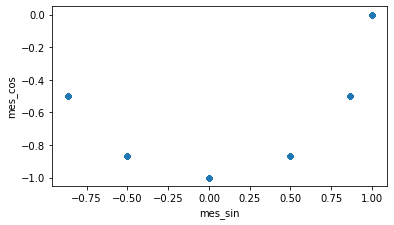

In [10]:
ax = df.plot.scatter('mes_sin', 'mes_cos').set_aspect('equal')

### Eliminar variables


In [11]:


del df['mes']
del df['dia_semana']
del df['hora_dia']

### Almacenamiento de datos

In [12]:
df

,Num_vehiculos_hora,mes_sin,mes_cos,hora_dia_sin,hora_dia_cos,dia_semana_sin,dia_semana_cos
Fecha,,,,,,,
2021-03-01 00:00:00,1871,1.000000,6.123234e-17,2.588190e-01,0.965926,0.781831,0.623490
2021-03-01 01:00:00,794,1.000000,6.123234e-17,5.000000e-01,0.866025,0.781831,0.623490
2021-03-01 02:00:00,478,1.000000,6.123234e-17,7.071068e-01,0.707107,0.781831,0.623490
2021-03-01 03:00:00,377,1.000000,6.123234e-17,8.660254e-01,0.500000,0.781831,0.623490
2021-03-01 04:00:00,639,1.000000,6.123234e-17,9.659258e-01,0.258819,0.781831,0.623490
...,...,...,...,...,...,...,...
2021-08-31 19:00:00,4348,-0.866025,-5.000000e-01,-8.660254e-01,0.500000,0.974928,-0.222521
2021-08-31 20:00:00,3628,-0.866025,-5.000000e-01,-7.071068e-01,0.707107,0.974928,-0.222521
2021-08-31 21:00:00,2322,-0.866025,-5.000000e-01,-5.000000e-01,0.866025,0.974928,-0.222521


In [13]:
# Store data 
with open('../Data/data_engi_v1.pickle', 'wb') as handle:
    dump(df, handle)